In [1]:
import gzip
import brotli
import blosc

import timeit

import matplotlib.pyplot as plt
import numpy as np

font = {'size'   : 18}
import matplotlib
matplotlib.rc('font', **font)

In [4]:
with open("0-512_0-512_64-80", "rb") as rawfile:
    raw_data = rawfile.read()

In [5]:
def compress_test(raw_data, compress_func, **kwargs):
    comp_data_len = len(compress_func(raw_data, **kwargs))
    print(f"{compress_func.__module__} {kwargs}", comp_data_len)
    result = %timeit -n1 -r5 -o compress_func(raw_data, **kwargs)
    return result, comp_data_len

In [6]:
gz_size, gz_qq, gz_results, gz_decompress_results = [], [], [], []
for q in range(1, 10):
    result, comp_data_len = compress_test(raw_data, gzip.compress, compresslevel=q)
    gz_results.append(result)
    gz_qq.append(q)
    gz_size.append(comp_data_len)

    #decompress test
    comp_data = gzip.compress(raw_data, compresslevel=q)
    result, _ = compress_test(comp_data, gzip.decompress)
    gz_decompress_results.append(result)

gzip {'compresslevel': 1} 6556868
305 ms ± 11.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 8388608
85.4 ms ± 4.44 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 2} 6533966
311 ms ± 5.32 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 8388608
81.7 ms ± 1.12 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 3} 6505599
400 ms ± 2.74 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 8388608
82 ms ± 1.07 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 4} 6581685
437 ms ± 2.72 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 8388608
80.5 ms ± 1.44 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 5} 6554756
524 ms ± 4.79 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 8388608
79.8 ms ± 1.77 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 6} 6539684
565 ms ± 3.04 ms per loop (mean ±

In [7]:
br_results, br_size, qq, brotli_decompress_results = [], [], [], []
for q in range(1, 9):
    result, comp_data_len = compress_test(raw_data, brotli.compress, quality=q)
    br_size.append(comp_data_len)
    br_results.append(result)
    qq.append(q)


    #decompress test
    comp_data = brotli.compress(raw_data, quality=q)
    result, _ = compress_test(comp_data, brotli.decompress)
    brotli_decompress_results.append(result)


brotli {'quality': 1} 6698383
46.3 ms ± 257 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 8388608
68.6 ms ± 370 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 2} 6523722
113 ms ± 218 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 8388608
70.5 ms ± 470 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 3} 6500608
145 ms ± 497 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 8388608
70.5 ms ± 428 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 4} 6634749
139 ms ± 1.11 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 8388608
68.6 ms ± 568 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 5} 6111878
791 ms ± 1.18 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 8388608
102 ms ± 954 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 6} 6043467
997 ms ± 30.8 ms per loop (mean ± std. dev. of 5

In [8]:
blosc_results, blosc_size, blosc_q, blosc_decompress_results = [], [], [], []
for q in range(3, 10):
    result, comp_data_len = compress_test(raw_data, blosc.compress, clevel=q)
    blosc_size.append(comp_data_len)
    blosc_results.append(result)
    blosc_q.append(q)

    #decompress test
    comp_data = blosc.compress(raw_data, clevel=q)
    result, _ = compress_test(comp_data, blosc.decompress)
    blosc_decompress_results.append(result)


blosc.toplevel {'clevel': 3} 8388624
7.14 ms ± 568 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 8388608
1.17 ms ± 216 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 4} 8380400
6.7 ms ± 458 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 8388608
610 µs ± 36.4 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 5} 8277772
9.37 ms ± 287 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 8388608
710 µs ± 59.1 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 6} 6783979
11.2 ms ± 171 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 8388608
2.56 ms ± 134 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 7} 6458747
11.7 ms ± 908 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 8388608
2.74 ms ± 103 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.

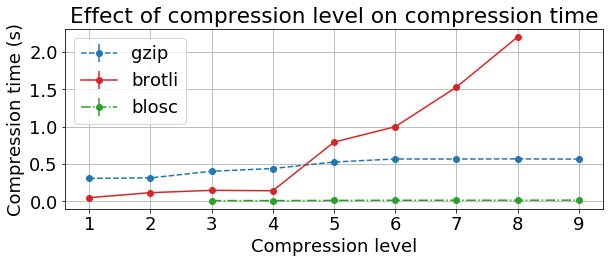

In [78]:
fig, ax1 = plt.subplots(figsize=(9, 4))

y = [sum(t.timings)/len(t.timings) for t in gz_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in gz_results]
h3 = ax1.errorbar(gz_qq, y, yerr, fmt='--o', color='tab:blue', label="gzip")

y = [sum(t.timings)/len(t.timings) for t in br_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in br_results]
h1 = ax1.errorbar(qq, y, yerr, fmt='-o', color='tab:red', label="brotli")

y = [sum(t.timings)/len(t.timings) for t in blosc_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in blosc_results]
h2 = ax1.errorbar(blosc_q, y, yerr, fmt='-.o', color='tab:green', label="blosc")

ax1.legend()
ax1.set_ylabel("Compression time (s)")
ax1.set_xlabel("Compression level")
ax1.set_title("Effect of compression level on compression time")

ax1.grid(True)
fig.tight_layout()
fig.savefig("compress.svg")

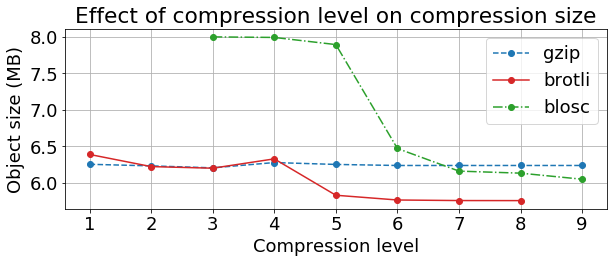

In [83]:
fig, ax2 = plt.subplots(figsize=(9, 4))
ax2.plot(gz_qq, [g/1024/1024 for g in gz_size], '--o', color='tab:blue', label="gzip")
ax2.plot(qq, [g/1024/1024 for g in br_size], '-o', color='tab:red', label="brotli")
ax2.plot(blosc_q, [g/1024/1024 for g in blosc_size], '-.o', color="tab:green", label="blosc")
ax2.legend()

ax2.set_ylabel("Object size (MB)")
ax2.set_xlabel("Compression level")
ax2.set_title("Effect of compression level on compression size")

ax2.grid(True)
fig.tight_layout()
fig.savefig("size.svg")

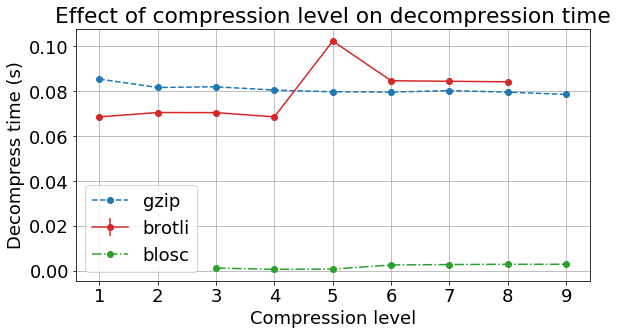

In [85]:
fig, ax1 = plt.subplots(figsize=(9, 5))

y = [sum(t.timings)/len(t.timings) for t in gz_decompress_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in gz_decompress_results]
h3 = ax1.errorbar(gz_qq, y, fmt='--o', color='tab:blue', label="gzip")

y = [sum(t.timings)/len(t.timings) for t in brotli_decompress_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in brotli_decompress_results]
h1 = ax1.errorbar(qq, y, yerr, fmt='-o', color='tab:red',label="brotli")

y = [sum(t.timings)/len(t.timings) for t in blosc_decompress_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in blosc_decompress_results]
h2 = ax1.errorbar(blosc_q, y, fmt='-.o', color='tab:green', label="blosc")


ax1.legend()
ax1.set_ylabel("Decompress time (s)")
ax1.set_xlabel("Compression level")
ax1.set_title("Effect of compression level on decompression time")

ax1.grid(True)
fig.tight_layout()
fig.savefig("decompress.svg")